In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from numpy.random import randn
from pandas import Series

%matplotlib inline

In [58]:
matches = pd.read_csv('matches.csv')
ratings = np.array(pd.read_csv('ratings_global.csv'))

In [59]:
BetH = (matches.B365H + matches.BWH + matches.IWH + matches.LBH +
        matches.VCH + matches.WHH) / 6
BetD = (matches.B365D + matches.BWD + matches.IWD + matches.LBD +
        matches.VCD + matches.WHD) / 6
BetA = (matches.B365A + matches.BWA + matches.IWA + matches.LBA +
        matches.VCA + matches.WHA) / 6

In [72]:
home_team = np.sum(ratings[:, :11], axis=1).reshape(len(ratings), 1)
away_team = np.sum(ratings[:, 11:], axis=1).reshape(len(ratings), 1)

In [18]:
result = [None] * len(matches)
for i in range(len(matches)):
    result[i] = ("1" if matches.home_team_goal[i] > matches.away_team_goal[i] else "2" if matches.home_team_goal[i] < matches.away_team_goal[i] else "X")

y = np.array(result)

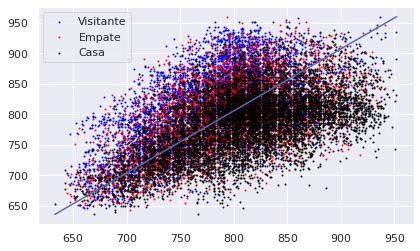

In [104]:
a = np.where(np.array(y) == '1')
b = np.where(np.array(y) == 'X')
c = np.where(np.array(y) == '2')

plt.figure()
i = 0
j = 1
plt.plot([X[:, i].min(), X[:, i].max()], [X[:, j].min(), X[:, j].max()])
plt.scatter(X[c][:, i], X[c][:, j], s=scale,
            label='Visitante', alpha=0.9, edgecolors='blue')
plt.scatter(X[b][:, i], X[b][:, j],  s=scale,
            label='Empate', alpha=0.9, edgecolors='red')
plt.scatter(X[a][:, i], X[a][:, j], s=scale,
            label='Casa', alpha=0.9, edgecolors='black')
plt.legend()

Mediante este gráfico podemos observar en el eje X la diferencia entre el puntuaje de los dos equipos (local y visitante) mientras que en eje Y se observa la probabilidad que tiene tanto el local como el visitante de ganar. Y por lo tanto en el medio estaría el empate. 
A simple vista podemos observar como hay muchos puntos negros con tendencia hacia la derecha del empate, es decir, la probabilidad de que el equipo local gane es más alta que la de que el equipo visitante gane. Posteriormente comentaremos esto más detalladamente en las conclusiones.

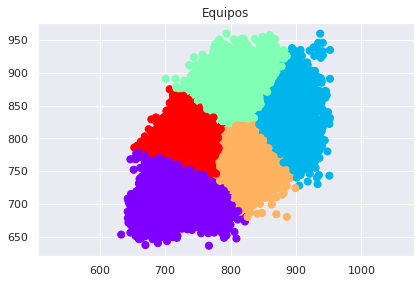

In [45]:
kmeans = KMeans(random_state=0, init='k-means++', n_clusters=5, n_init=10).fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');
plt.axis('equal')
plt.title('Equipos')
plt.show()

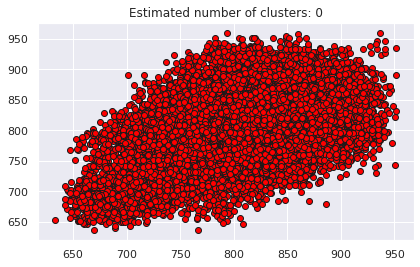

In [89]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


unique_labels = set(labels)
colors = ['blue', 'black', '#7B1FA2', '#512DA8', '#303F9F', '#1976D2', '#0288D1', '#0097A7', '#00796B']
for k, col in zip(unique_labels, colors):
    if k == -1:
      
        col = 'red'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()